# [Parsing Dates](https://www.kaggle.com/code/alexisbcook/parsing-dates)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import datetime

In [2]:
np.random.seed(0)

In [3]:
landslides = pd.read_csv('catalog.csv')
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Notice that at the bottom of the output, it says that the data type of this column is `object`. There is a specific `datetime64` dtype in pandas. <br>
Python doesn't yet know that this column contains dates because the dtype of our column is `object` rather than `datetime64`.

Alternatively, we can check the datatype of a column like this:

In [5]:
landslides['date'].dtype

dtype('O')

The dtype letter code `O` is for "object".

## Convert the date column to `datetime64`

Determine the format of dates using this guide called the ["strftime directive"](https://strftime.org/). <p>
The most common are `%d` for day, `%m` for month, `%y` for two-digit year and `%Y` for four digit year. <br>
For example:<br>
&nbsp;&nbsp;&nbsp;&nbsp; `1/17/07` is in the format `"%m/%d/%y"` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `17-1-2007` is in the format `"%d-%m-%Y"`

In [6]:
# Create a new column with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

### NOTE:
While specifying the date format, sometimes you'll run into an error when there are multiple date formats in a single column. <br>
If that happens, you can have pandas try to infer what the right date format should be. You can do that like this: <br>
`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`
<p>
    There are two big reasons not to always have pandas guess the time format. <br>
    The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. <br>
    The second is that it's much slower than specifying the exact format of the dates.
</p>

## Select day of the month
Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [7]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

## Plot the day of the month to check date parsing
One of the biggest dangers in parsing dates is mixing up the months and days. The `to_datetime()` function does have helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

C:\Users\Deepshik\AppData\Local\Temp\ipykernel_8520\1508271870.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

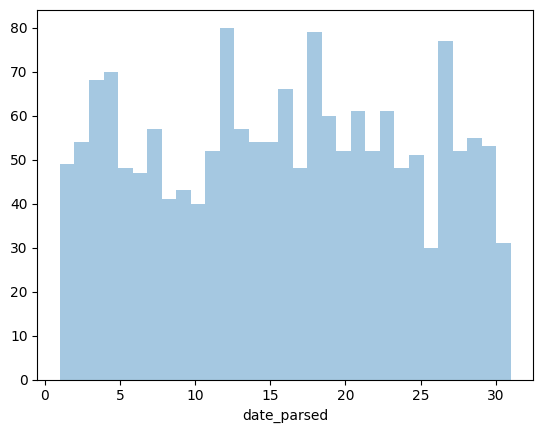

In [8]:
# Remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

#Plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

## Plot months to check parsing

C:\Users\Deepshik\AppData\Local\Temp\ipykernel_8520\4208272527.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(months_landslides, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

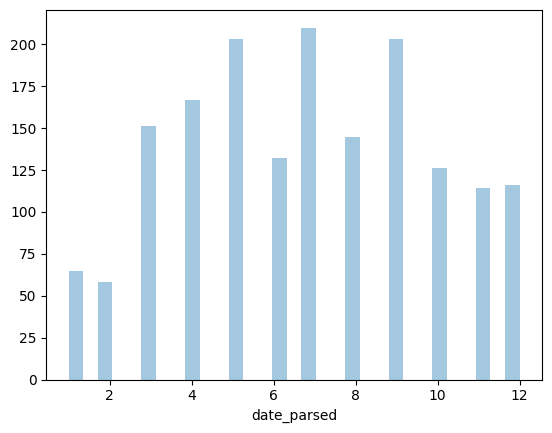

In [9]:
months = landslides['date_parsed'].dt.month

months_landslides = months.dropna()

sns.distplot(months_landslides, kde=False, bins=31)